# Natural Language Processing with Disaster Tweets

## Problem Definition

Disaster relief organizations and news agencies are increasingly interested in monitoring social media platforms like Twitter to quickly identify and respond to natural disasters. Given the vast amount of information shared on Twitter, it can be challenging to distinguish between tweets related to real disasters and those that are not. The goal of this project is to build a machine learning model that can predict whether a tweet is about an actual disaster or not. 

## Data & Preprocessing
The model is developed using a dataset of 10,000 hand-classified tweets, which are used for both training and testing the model.

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("/Users/pranathi_sec/Library/Mobile Documents/com~apple~CloudDocs/Documents/Kaggle/NLPwithDisasterTweets/nlp-getting-started/train.csv")

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

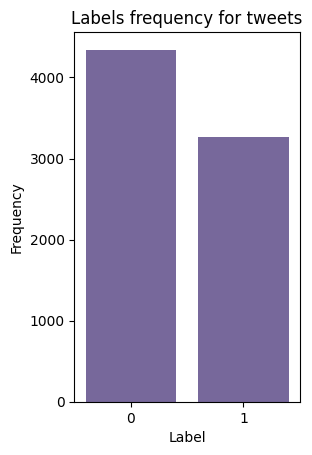

In [5]:
# Plot for tweets
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='target', color = "#7360a3")
plt.title('Labels frequency for tweets')
plt.xlabel('Label')
plt.ylabel('Frequency')

In [6]:
train_data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

To assess the balance of the classes in the dataset, I created a bar plot visualizing the distribution of the target column. The plot reveals that the dataset is imbalanced, with 4,372 tweets classified as "Not Disasters" and 3,271 tweets classified as "Disasters." This imbalance may influence the model's performance.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**Data Cleaning**

In [8]:
train_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

There are 61 missing values in keywords and 2533 missing values in location fields. For the initial model, I'll ignore these variables and base my model and analysis on 'text'. When refining the model, later,  I'll assess the impact of these variables on performance.

In [9]:
import numpy as np
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranathi_sec/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranathi_sec/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
print(stopwords.fileids())


['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [11]:

stop_words = set(nltk.corpus.stopwords.words('english'))


Converting the list of stopwords from corpus into a set to improve lookup efficiency

In [12]:
print("\n",stop_words)



 {'himself', 'ours', 'now', 'on', 'which', "it'll", "you'll", "he's", 'weren', 'whom', "hasn't", 'don', 'from', 'doing', "weren't", 'shouldn', 'very', 'further', 't', 'here', 'couldn', 'if', 'what', 'are', 'both', 'these', 'your', "aren't", 'o', "he'd", 'while', "she'd", 'does', "we've", 'above', 'most', "she'll", 'over', "you're", 'an', "couldn't", 'be', 'do', 'or', 'she', 'aren', 'just', 'mustn', "she's", 'but', 'where', "i'm", 'that', "haven't", 'ain', 'ma', 'my', "wouldn't", 'was', 'should', "wasn't", 'didn', 'again', 'those', "shan't", 'when', 'before', 'theirs', 'how', 'after', 'why', 'any', 've', 'i', 'did', "he'll", 'herself', 'it', "i'll", 'll', 'will', 'a', 's', "don't", 'during', 'has', 'into', "didn't", 'wasn', 'having', "we're", 'at', "should've", 'd', 'between', 'is', "you'd", "they've", 'such', 'not', 'than', 'up', "it's", 'm', 'shan', 'their', 'him', 'yours', "we'll", 'once', 'being', 'y', 'then', 'themselves', 'there', 'ourselves', 're', 'hasn', "that'll", "it'd", 'be

In [13]:
# Function to clean tweets
def clean_tweets(text):
    text= text.lower() # convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]','',text) #replacing non-letters or whitespaces space
    text = re.sub(r'https\S+','htmltoken',text) # replace all html URLs with html token
    text= re.sub(r'@[\w]+','twitterhandle',text) # replace all twitter handles with a single token
    words = nltk.tokenize.word_tokenize(text) #Tokenize tweets
    filtered_words = [word for word in words if word not in stop_words] #remove stopwords
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

#train_data['clean_text'] = train_data['text'].apply(clean_tweets)    

Replaced all HTML URLs with a generic html token and Twitter handles with a single token. Individual URLs or Twitter handles generally add noise to the data, but in certain contexts, patterns from multiple URLs or handles could reveal useful insights

In [16]:
#train_data['clean_text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: clean_text, dtype: object

In [17]:
#train_data.to_csv('explore_output.csv', index=False)

### Another way to tokenize, remove later if not necessary

In [18]:
# Tokenization
from nltk.tokenize import TweetTokenizer

# Initialize TweetTokenizer
tweet_tokenizer = TweetTokenizer()
train_data['tokenized_tweets'] = train_data['text'].apply(tweet_tokenizer.tokenize)
train_data['tokenized_tweets'].head()


0    [Our, Deeds, are, the, Reason, of, this, #eart...
1     [Forest, fire, near, La, Ronge, Sask, ., Canada]
2    [All, residents, asked, to, ', shelter, in, pl...
3    [13,000, people, receive, #wildfires, evacuati...
4    [Just, got, sent, this, photo, from, Ruby, #Al...
Name: tokenized_tweets, dtype: object

In [20]:
train_data.to_csv('explore_output2.csv', index=False)

In [21]:
#train_data.head()

,id,keyword,location,text,target,clean_text,tokenized_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,"[All, residents, asked, to, ', shelter, in, pl..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...,"[13,000, people, receive, #wildfires, evacuati..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,"[Just, got, sent, this, photo, from, Ruby, #Al..."


# Classification
Disaster tweet or not a disaster tweet

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_data[['text']], train_data['target'], test_size=0.2, random_state=42)

In [18]:
X_train['text'] = X_train['text'].apply(clean_tweets)
X_test['text'] = X_test['text'].apply(clean_tweets)

In [27]:
print(X_train)

                                                   text
4996  courageous honest analysis need use atomic bom...
3263  zachzaidman thescore wld b shame golf cart bec...
4907  tell barackobama rescind medals honor given us...
2855  worried ca drought might affect extreme weathe...
4716  youngheroesid lava blast amp power red panther...
...                                                 ...
5226  eganator arent many obliteration servers alway...
5390  panic attack bc dont enough money drugs alcoho...
860   omron hemc automatic blood pressure monitor st...
7603  officials say quarantine place alabama home po...
7270  moved england five years ago today whirlwind t...

[6090 rows x 1 columns]


In [32]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

In [35]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

In [36]:
print(tfidf_vectorizer.vocabulary_)

{'need': 601, 'use': 917, 'atomic': 54, 'bomb': 105, 'hiroshima': 429, 'military': 567, 'htmltoken': 445, 'engulfed': 278, 'flames': 330, 'tell': 842, 'us': 915, 'massacre': 552, 'wounded': 979, 'sign': 784, 'amp': 29, 'rt': 733, 'drought': 260, 'might': 565, 'weather': 949, 'lava': 499, 'blast': 91, 'power': 681, 'red': 708, 'wreckage': 983, 'conclusively': 180, 'confirmed': 181, 'mh': 563, 'malaysia': 545, 'pm': 673, 'investigators': 465, 'families': 303, 'emergency': 275, 'plan': 665, 'issues': 476, 'flood': 334, 'till': 866, 'aug': 57, 'cdt': 146, 'chinas': 159, 'stock': 816, 'market': 549, 'crash': 191, 'gems': 361, 'rubble': 734, 'getting': 366, 'hit': 431, 'ball': 68, 'accident': 3, 'war': 938, 'zone': 999, 'one': 634, 'pick': 661, 'fan': 306, 'army': 46, 'county': 188, 'thunderstorm': 864, 'armageddon': 45, 'theater': 852, 'shooting': 777, 'expected': 291, 'mass': 551, 'murder': 587, 'nothing': 613, 'else': 274, 'officials': 626, 'say': 750, 'quarantine': 693, 'place': 664, 'ho

In [38]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(6090, 1000)
(1523, 1000)


In [39]:
print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28691 stored elements and shape (6090, 1000)>
  Coords	Values
  (0, 601)	0.3850270200503191
  (0, 917)	0.4332848747679895
  (0, 54)	0.39958284422752083
  (0, 105)	0.3654969040194468
  (0, 429)	0.3663960939240471
  (0, 567)	0.40739465308699807
  (0, 445)	0.26560774437698204
  (1, 278)	0.7362038909673329
  (1, 330)	0.6767598029763287
  (2, 445)	0.24226261740381194
  (2, 842)	0.4047472188403656
  (2, 915)	0.2996584608144712
  (2, 552)	0.3888995780611888
  (2, 979)	0.39745397994467274
  (2, 784)	0.4427112377150656
  (2, 29)	0.2681222547458184
  (2, 733)	0.332562758637716
  (3, 260)	0.5640433355267528
  (3, 565)	0.6226264748345994
  (3, 949)	0.5423941265195401
  (4, 29)	0.3179104893472669
  (4, 499)	0.47125811834237646
  (4, 91)	0.47402898330370735
  (4, 681)	0.47690853697065555
  (4, 708)	0.47402898330370735
  :	:
  (6086, 645)	0.2975879355261966
  (6086, 55)	0.26068526205107734
  (6086, 507)	0.2826236494896704
  (6086, 74)	0.31

In [43]:
# Reverse the vocabulary dictionary
index_to_word = {index: word for word, index in tfidf_vectorizer.vocabulary_.items()}

# Look up the word for column 278
word_at_278 = index_to_word.get(278)
print(word_at_278)


engulfed


In [44]:
 #Initialize a list to hold the results
words_above_threshold = {}

# Iterate over each document in the sparse matrix
for doc_index in range(X_train_tfidf.shape[0]):  # Loop through each document
    # Get the row for the current document
    row = X_train_tfidf[doc_index]
    
    # Find indices where the TF-IDF score is greater than 0.5
    indices = row.indices[row.data > 0.7]  # Only get indices with a score > 0.5
    
    # Map indices to words
    words = [index_to_word[index] for index in indices]
    
    # Store words for the current document
    words_above_threshold[doc_index] = words

# Print words with TF-IDF > 0.5 for each document
for doc_index, words in words_above_threshold.items():
    print(f"Document {doc_index}: {words}")

Document 0: []
Document 1: ['engulfed']
Document 2: []
Document 3: []
Document 4: []
Document 5: []
Document 6: ['plan']
Document 7: []
Document 8: []
Document 9: []
Document 10: []
Document 11: ['pm']
Document 12: ['armageddon']
Document 13: []
Document 14: []
Document 15: []
Document 16: []
Document 17: []
Document 18: []
Document 19: []
Document 20: []
Document 21: []
Document 22: []
Document 23: []
Document 24: []
Document 25: []
Document 26: ['forest']
Document 27: []
Document 28: []
Document 29: ['guy']
Document 30: []
Document 31: []
Document 32: []
Document 33: ['fatal']
Document 34: []
Document 35: []
Document 36: []
Document 37: ['hail']
Document 38: []
Document 39: ['travel']
Document 40: []
Document 41: []
Document 42: []
Document 43: []
Document 44: []
Document 45: []
Document 46: []
Document 47: []
Document 48: []
Document 49: []
Document 50: []
Document 51: ['nigerian']
Document 52: []
Document 53: []
Document 54: ['become']
Document 55: []
Document 56: []
Document 57: [

In [47]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/3d/5d/b51a970694ca5feda24cec7dbd37a63bcecd3e5735386840b0ed883bd3df/wordcloud-1.9.4-cp312-cp312-macosx_10_13_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 2.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [49]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [50]:
tfidf_scores = X_train_tfidf.sum(axis=0).A1

In [51]:
word_freq = dict(zip(feature_names, tfidf_scores))

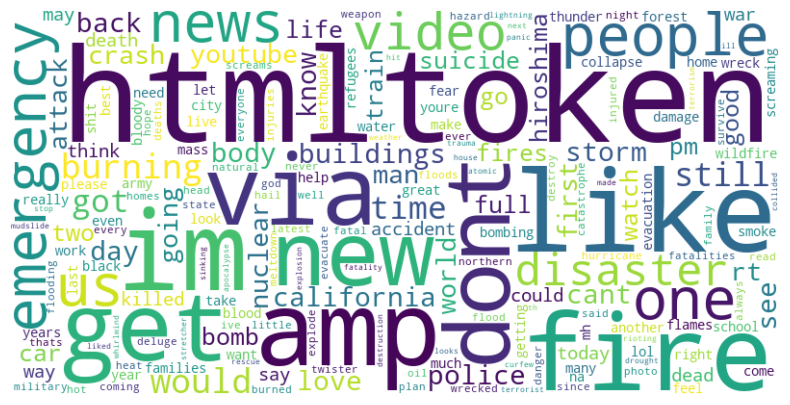

In [52]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the word cloud above, generated from the 1000 features (with high top tf-idf scores), we can see that htmltoken appears across many tweets. via, like, new, im, get have high tf-idf scores but they don't make much sense to classification of whether the tweet is disaster or not. It would perhaps help to further reduce dimensionality by using singular value decomposition to find patterns among terms.

## Singular Value Decomposition ##

In [58]:
n_components = 50 # Choose the number of dimensions to retain
svd = TruncatedSVD(n_components=n_components)

In [59]:
reduced_train_matrix = svd.fit_transform(X_train_tfidf)
reduced_test_matrix = svd.transform(X_test_tfidf)

In [60]:
reduced_train_df = pd.DataFrame(reduced_train_matrix, columns=[f'Latent_Feature_{i+1}' for i in range(n_components)])

In [ ]:
terms = tfidf_vectorizer.get_feature_names_out()

In [ ]:
top_n = 10

In [64]:
# Inspect the components (V^T matrix)
terms = tfidf_vectorizer.get_feature_names_out()  # Get the terms from the vectorizer
top_n = 15 # Number of top terms to inspect per dimension
#Retrieve Vt matrix
Vt = svd.components_ 
# Loop through dimensions and get the top contributing terms
for i, component in enumerate(Vt[:3]):  # Vt[:2] means we're looking at the first 2 dimensions
    print(f"\nLatent Dimension {i+1}:")
    sorted_indices = component.argsort()[::-1]  # Sort indices by descending importance
    top_terms = [(terms[index], component[index]) for index in sorted_indices[:top_n]]
    for term, weight in top_terms:
        print(f"{term}: {weight:.4f}")



Latent Dimension 1:
htmltoken: 0.5477
im: 0.2606
like: 0.2495
fire: 0.2386
amp: 0.1953
burning: 0.1317
via: 0.1257
buildings: 0.1203
get: 0.1185
dont: 0.1151
one: 0.1074
people: 0.0993
new: 0.0975
us: 0.0942
video: 0.0896

Latent Dimension 2:
htmltoken: 0.7658
via: 0.0677
youtube: 0.0501
riot: 0.0324
soon: 0.0273
rescue: 0.0258
danger: 0.0248
coming: 0.0240
accident: 0.0224
flattened: 0.0198
truth: 0.0196
fatalities: 0.0195
link: 0.0192
landslide: 0.0181
arson: 0.0164

Latent Dimension 3:
fire: 0.7126
buildings: 0.1744
forest: 0.1370
california: 0.1351
truck: 0.1115
burning: 0.0993
wildfire: 0.0948
news: 0.0923
video: 0.0912
via: 0.0873
emergency: 0.0860
fires: 0.0778
homes: 0.0777
northern: 0.0716
youtube: 0.0674


Latent dimension or concepts interpretation:
Dimension/Concept 1: Fire accidents

Dimension/concpet 2: Rescue requests/ reports

Dimension/concept 3: Wildfires


# Classification

In [66]:
# Try different kernels
from sklearn.model_selection import cross_val_score
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    model = SVC(kernel=kernel)
    scores = cross_val_score(model, reduced_train_matrix, y_train, cv=5, scoring='accuracy')
    print(f"{kernel} kernel accuracy: {np.mean(scores):.4f}")

linear kernel accuracy: 0.7351
rbf kernel accuracy: 0.7612
poly kernel accuracy: 0.7087


In [68]:
svm_classifier = SVC(kernel='rbf')  # Linear kernel for SVM

    # Train the SVM classifier
svm_classifier.fit(reduced_train_matrix, y_train)

    # Predict the labels for the test set
y_pred = svm_classifier.predict(reduced_test_matrix)

    # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7511490479317138
